# Setup






#Getting the data

In [274]:
# csv file upload 
from google.colab import files
f = files.upload()

Saving datcw_na.csv to datcw_na (2).csv


In [275]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Common imports
import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/datcw_na.csv')





##Quick Look at the Data Structure

In [276]:
#Returns description of the data in the DataFrame and distributions of variables
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
count,768.000000,768.000000,728.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.763516,666.768997,321.102527,176.564141,5.229766,3.527331,0.237852,2.803737,22.307201
std,0.147093,120.863329,60.479340,51.280618,1.844813,1.245710,0.139736,1.597817,10.090196
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.650000,575.510000,277.830000,132.300000,3.470000,2.427500,0.100000,1.517500,12.992500
50%,0.750000,661.500000,315.320000,178.235000,4.955000,3.600000,0.240000,2.970000,18.950000
75%,0.860000,741.130000,355.740000,218.300000,6.930000,4.425000,0.360000,3.960000,31.667500
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


In [277]:
#Shows first 5 records in csv file
data.head()


,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


In [278]:
#Shows what data tpye of the columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      768 non-null    object 
 1   X1      768 non-null    float64
 2   X2      768 non-null    float64
 3   X3      728 non-null    float64
 4   X4      768 non-null    float64
 5   X5      768 non-null    float64
 6   X6      768 non-null    float64
 7   X7      768 non-null    float64
 8   X8      768 non-null    float64
 9   Y       768 non-null    float64
dtypes: float64(9), object(1)
memory usage: 60.1+ KB


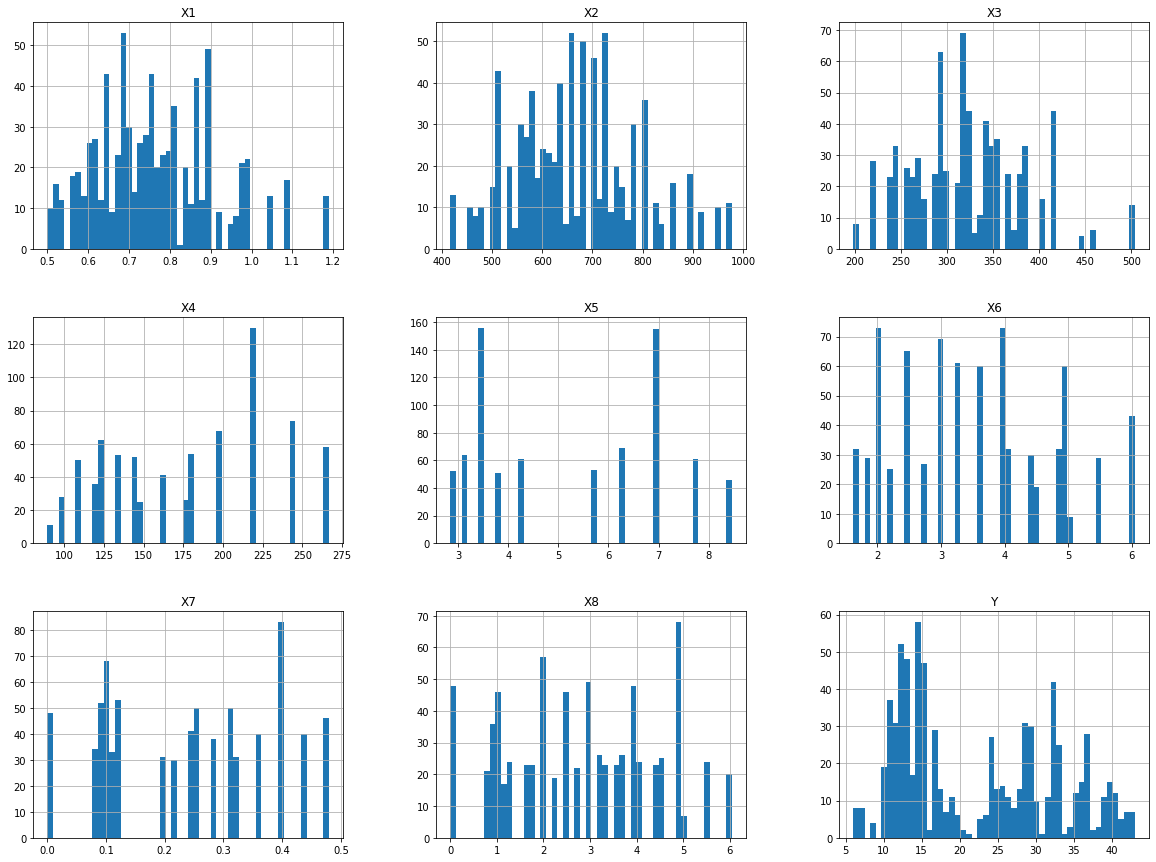

In [279]:
# Plots histograms
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

##Looking for Correlations

In [280]:
# Shows the correlations of the specific heat capcity ("Y") to other variables
corr_matrix = data.corr()
corr_matrix["Y"].sort_values(ascending=False)

Y     1.000000
X5    0.815769
X1    0.454177
X3    0.312449
X7    0.255901
X8    0.087106
X6    0.001340
X2   -0.481192
X4   -0.771040
Name: Y, dtype: float64

## Create a Test Set

In [281]:
# To make this notebook's output identical at every run
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.3, random_state=42)


In [282]:
data = train_set.drop("Y", axis=1) # drop labels for training set
data_labels = train_set["Y"].copy()

In [283]:
# Shows all records with Null values. 
nan_in_col  = data[data["X3"].isna()]
nan_in_col 


,X0,X1,X2,X3,X4,X5,X6,X7,X8
333,C1,0.68,727.65,NaN,242.55,3.47,2.70,0.20,0.99
417,C1,0.84,727.65,NaN,266.80,3.85,2.97,0.25,3.63
453,C1,0.76,595.35,NaN,99.23,8.47,2.97,0.25,3.24
88,C2,0.64,776.16,NaN,242.55,3.85,1.80,0.10,1.10
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.00,0.00
278,C2,0.53,919.00,NaN,218.30,3.85,3.96,0.10,5.50
649,C1,0.89,679.14,NaN,218.30,3.85,2.43,0.44,3.63
664,C1,0.64,784.00,NaN,178.60,4.24,2.42,0.48,2.70
495,C2,0.67,606.38,NaN,145.53,6.30,4.05,0.22,4.95
493,C2,0.99,606.38,NaN,161.70,7.00,2.97,0.24,4.95


# Prepare the Data for Machine Learning Algorithms

## Data Cleaning

In [284]:
# There are 3 options I could do to deal with this issue 

# option 1 drop the rows with missing values.
# option 2 drop the column with missing values.
# option 3 compute median and impute (fill in with median) the missing values.

# I chose to pick option 3 as the rest of the data are not all a
# constant value and hence have a varince to impact the prediction of the model.

median = data["X3"].median()
data["X3"].fillna(median, inplace=True)


In [285]:
# Checks to see if null values have been replaced 
nan_in_col2  = data[data["X3"].isna()]
nan_in_col2

,X0,X1,X2,X3,X4,X5,X6,X7,X8


In [286]:
# In future data where there are missing values the inputer allows us to fill missing values on some of these variables 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [287]:
# Median can only be calculated on numerical attributes so we drop the "X0" column 
data_num = data.drop("X0", axis=1)

In [288]:
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [289]:
# Shows the medians computed by the imputer.
imputer.statistics_

array([7.5000e-01, 6.6150e+02, 3.1532e+02, 1.7860e+02, 4.2400e+00,
       3.6000e+00, 2.5000e-01, 2.9700e+00])

In [290]:
#Comparing the median values to see if they are the same.
data_num.median().values

array([7.5000e-01, 6.6150e+02, 3.1532e+02, 1.7860e+02, 4.2400e+00,
       3.6000e+00, 2.5000e-01, 2.9700e+00])

In [291]:
X = imputer.transform(data_num)

In [292]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index=data.index)

In [293]:
data_tr.loc[data.index.values]

,X1,X2,X3,X4,X5,X6,X7,X8
334,0.61,800.42,363.82,242.55,2.84,3.96,0.24,0.99
139,0.63,705.60,339.57,198.45,3.85,6.05,0.10,1.98
485,0.99,557.86,315.32,110.25,6.30,3.30,0.28,5.00
547,0.71,630.63,339.57,119.07,7.70,6.05,0.36,0.99
18,0.71,630.63,377.30,119.07,5.67,3.60,0.00,0.00
...,...,...,...,...,...,...,...,...
71,0.75,654.89,416.50,121.28,8.47,4.05,0.09,0.90
106,1.04,582.12,291.06,161.70,7.70,3.96,0.09,2.42
270,0.86,575.51,326.10,242.55,3.47,4.84,0.12,6.05
435,0.97,509.36,355.74,109.15,6.93,6.05,0.31,3.24


In [294]:
imputer.strategy

'median'

In [295]:
data_tr.head()

,X1,X2,X3,X4,X5,X6,X7,X8
334,0.61,800.42,363.82,242.55,2.84,3.96,0.24,0.99
139,0.63,705.60,339.57,198.45,3.85,6.05,0.10,1.98
485,0.99,557.86,315.32,110.25,6.30,3.30,0.28,5.00
547,0.71,630.63,339.57,119.07,7.70,6.05,0.36,0.99
18,0.71,630.63,377.30,119.07,5.67,3.60,0.00,0.00


## Handling Text and Categorical Attributes

In [296]:
# Makes a duplicate of the "X0" column that is categoric 
data_cat = data[["X0"]]

data_cat.head(10)

,X0
334,C3
139,C3
485,C2
547,C1
18,C2
593,C1
140,C1
326,C2
266,C2
626,C1


In [297]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

<537x3 sparse matrix of type '<class 'numpy.float64'>'
	with 537 stored elements in Compressed Sparse Row format>

In [298]:
#Shows the types of categories 
cat_encoder.categories_

[array(['C1', 'C2', 'C3'], dtype=object)]

In [299]:
data_cat_1hot.toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Transformation Pipelines

In [300]:
# Pipeline to preprocess the numerical attributes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

data_num_tr = num_pipeline.fit_transform(data_num)

In [301]:
data_num_tr

array([[-1.03443078,  1.07099616,  0.74848195, ...,  0.35749091,
         0.00490148, -1.16327892],
       [-0.89814782,  0.29534228,  0.33497246, ...,  2.08630327,
        -0.99102645, -0.54348139],
       [ 1.55494538, -0.91321187, -0.07853703, ..., -0.18844984,
         0.28945232,  1.34721409],
       ...,
       [ 0.66910617, -0.76882997,  0.10528286, ...,  1.0854119 ,
        -0.84875103,  2.00457511],
       [ 1.41866242, -1.30995531,  0.61070229, ...,  2.08630327,
         0.50286545,  0.24535182],
       [ 1.55494538, -0.91321187, -1.05629515, ...,  0.35749091,
        -1.13330187, -0.40574861]])

In [302]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["X0"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)

In [303]:
data_prepared

array([[-1.03443078,  1.07099616,  0.74848195, ...,  0.        ,
         0.        ,  1.        ],
       [-0.89814782,  0.29534228,  0.33497246, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55494538, -0.91321187, -0.07853703, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.66910617, -0.76882997,  0.10528286, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.41866242, -1.30995531,  0.61070229, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.55494538, -0.91321187, -1.05629515, ...,  0.        ,
         0.        ,  1.        ]])

# Linear regression

In [304]:
# A simple linear regression to predict the heating load values

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [305]:
# Prediction of Linear Regression  on training set
data_some = data.iloc[:5]
labels_some = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(data_some)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [12.43433171 14.64306379 30.11799368 34.95301158 23.54064133]


In [306]:
print("Labels:", list(labels_some))

Labels: [15.08, 15.19, 32.31, 41.67, 29.63]


In [307]:
some_data_prepared

array([[-1.03443078,  1.07099616,  0.74848195,  1.29072766, -1.26105905,
         0.35749091,  0.00490148, -1.16327892,  0.        ,  0.        ,
         1.        ],
       [-0.89814782,  0.29534228,  0.33497246,  0.41168626, -0.71673846,
         2.08630327, -0.99102645, -0.54348139,  0.        ,  0.        ,
         1.        ],
       [ 1.55494538, -0.91321187, -0.07853703, -1.34639653,  0.60364318,
        -0.18844984,  0.28945232,  1.34721409,  0.        ,  1.        ,
         0.        ],
       [-0.353016  , -0.3179331 ,  0.33497246, -1.17058826,  1.35814697,
         2.08630327,  0.858554  , -1.16327892,  1.        ,  0.        ,
         0.        ],
       [-0.353016  , -0.3179331 ,  0.97834207, -1.17058826,  0.26411647,
         0.05970505, -1.70240355, -1.78307645,  0.        ,  1.        ,
         0.        ]])

In [308]:
# MAE on the linear regressionin relation to the training set
from sklearn.metrics import mean_absolute_error

data_predictions = lin_reg.predict(data_prepared)
lin_mae = mean_absolute_error(data_labels, data_predictions)
lin_mae

3.4605726367564134

In [336]:
# RMSE on the linear regressionin relation to the training set
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.522586051646868

In [310]:
#Shows the parameters of the linear regression 
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

## Fine tunning model via grid search

In [311]:
# Tunning of the linear model 

# copy_X if true X will be copied; else, it may be overwritten.
# fit_intercept calculates the intercept of the model 
# n_jobs number of jobs used for computaion I have selected -1 as it will means using all processors
# positive forces the coefficients to be positiv

from sklearn.model_selection import GridSearchCV

param_grid = {"positive" : [True, False] }
lin_reg_grid = GridSearchCV(lin_reg, param_grid,cv=10,verbose=2, n_jobs =-1)
lin_reg_grid.fit(data_prepared, data_labels)



Fitting 10 folds for each of 2 candidates, totalling 20 fits


GridSearchCV(cv=10, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'positive': [True, False]}, verbose=2)

In [312]:
# Cross validation results in full as a dataframe
pd.DataFrame(lin_reg_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_positive,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004095,0.002150,0.001669,0.001607,True,{'positive': True},0.78129,0.766699,0.786477,0.786866,0.731701,0.769362,0.737254,0.733137,0.681500,0.772499,0.754679,0.031755,2
1,0.002932,0.000526,0.001006,0.000089,False,{'positive': False},0.80659,0.794199,0.785071,0.814314,0.743858,0.814885,0.776228,0.747022,0.710252,0.833205,0.782562,0.036560,1


In [313]:
# The best score found
lin_reg_grid.best_score_

0.7825623736612225

In [314]:
# The best hyperparameter combination found
lin_reg_grid.best_params_

{'positive': False}

# Ridge Regression

In [315]:
# Fitting a ridge regression to predict the heating load values

from sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=23)
ridge_reg.fit(data_prepared, data_labels)

Ridge(random_state=23)

In [316]:
# Prediction of Ridge Regression on training set

print("Predictions:", ridge_reg.predict(some_data_prepared))

Predictions: [12.44088179 14.65502958 30.12802667 34.92687323 23.55007985]


In [317]:
#Comparison to the exsiting values 
print("Labels:", list(labels_some))

Labels: [15.08, 15.19, 32.31, 41.67, 29.63]


In [318]:
# RMSE error on the Ridge Regression in relation to the training set

from sklearn.metrics import mean_squared_error

data_predictions2 = ridge_reg.predict(data_prepared)
lin_mse2 = mean_squared_error(data_labels, data_predictions2)
lin_rmse2 = np.sqrt(lin_mse2)
lin_rmse2

4.522611698211332

In [319]:
ridge_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': 23,
 'solver': 'auto',
 'tol': 0.0001}

## Fine tunning model via grid search

In [320]:
from sklearn.model_selection import GridSearchCV


parameters={'alpha':[0.001, 0.01, 0.1,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge_reg,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(data_prepared,data_labels)

GridSearchCV(cv=5, estimator=Ridge(random_state=23),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 35, 40,
                                   45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [321]:
#Shows the best possible parameters 
ridge_regressor.best_params_

{'alpha': 5}

In [322]:
ridge_regressor.best_estimator_

Ridge(alpha=5, random_state=23)

In [323]:
# Cross validation results in full as a dataframe
pd.DataFrame(ridge_regressor.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002359,0.000476,0.001601,0.001298,0.001,{'alpha': 0.001},-19.026522,-23.145076,-21.837626,-24.059301,-18.729382,-21.359581,2.147842,6
1,0.002097,0.000260,0.000961,0.000120,0.01,{'alpha': 0.01},-19.026440,-23.145423,-21.837554,-24.058915,-18.729366,-21.359539,2.147821,5
2,0.002076,0.000279,0.001387,0.000582,0.1,{'alpha': 0.1},-19.025624,-23.148888,-21.836835,-24.055058,-18.729211,-21.359123,2.147612,4
3,0.002406,0.000882,0.000906,0.000073,1,{'alpha': 1},-19.017877,-23.183543,-21.830148,-24.017169,-18.727887,-21.355325,2.145709,3
4,0.002152,0.000255,0.001185,0.000531,5,{'alpha': 5},-18.991884,-23.337567,-21.810623,-23.862836,-18.726730,-21.345928,2.140987,1
5,0.001980,0.000013,0.000959,0.000074,10,{'alpha': 10},-18.976497,-23.529858,-21.806966,-23.698847,-18.734635,-21.349360,2.142490,2
6,0.002455,0.000842,0.000929,0.000131,20,{'alpha': 20},-18.991514,-23.912650,-21.855438,-23.450103,-18.774352,-21.396811,2.164187,7
7,0.002074,0.000068,0.000959,0.000008,30,{'alpha': 30},-19.053617,-24.292270,-21.961427,-23.284805,-18.837267,-21.485877,2.203141,8
8,0.003052,0.001386,0.000977,0.000199,35,{'alpha': 35},-19.098565,-24.480800,-22.031390,-23.227269,-18.875199,-21.542645,2.227033,9
9,0.001908,0.000225,0.000823,0.000120,40,{'alpha': 40},-19.151301,-24.668490,-22.110838,-23.183981,-18.916622,-21.606246,2.253088,10


In [324]:
# Evaluating my optimised system on the test set

final_model = ridge_regressor.best_estimator_

X_test = test_set.drop("Y", axis=1)
y_test = test_set["Y"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [325]:
# Comparison of RMSE before and after optimisation 

print("RMSE before optimisation:",lin_rmse2)
print("Final RMSE after optimisation:",final_rmse)


RMSE before optimisation: 4.522611698211332
Final RMSE after optimisation: 4.384157959836937


# Lasso Regression 

In [326]:
# Fitting a lasso regression to predict the heating load values
from sklearn.linear_model import Lasso

lass_reg = Lasso(random_state=23)
lass_reg.fit(data_prepared, data_labels)

Lasso(random_state=23)

In [327]:
# Prediction of Lasso Regression on training set

print("Predictions:", lass_reg.predict(some_data_prepared))

Predictions: [13.00005953 15.90559092 28.97444849 33.59781893 24.06991683]


In [328]:
# Comparison to the exsiting values 
print("Labels:", list(labels_some))

Labels: [15.08, 15.19, 32.31, 41.67, 29.63]


In [329]:
# Seeing the parameters of lasso regression
lass_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': 23,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

## Fine tunning model via grid search

In [330]:
from sklearn.model_selection import GridSearchCV


parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100], "max_iter" :[4000]}
lass_regressor=GridSearchCV(lass_reg,parameters,scoring='neg_mean_squared_error',cv=10 )
lass_regressor.fit(data_prepared,data_labels)

GridSearchCV(cv=10, estimator=Lasso(random_state=23),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100],
                         'max_iter': [4000]},
             scoring='neg_mean_squared_error')

In [331]:
#Shows the best possible parameters 
lass_regressor.best_params_

{'alpha': 0.01, 'max_iter': 4000}

In [332]:
lass_regressor.best_estimator_

Lasso(alpha=0.01, max_iter=4000, random_state=23)

In [333]:
# Cross validation results in full as a dataframe
pd.DataFrame(lass_regressor.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015134,0.015969,0.001287,0.000560,0.0,4000,"{'alpha': 1e-15, 'max_iter': 4000}",-21.165295,-18.101301,-24.929111,-20.986633,-24.201322,-18.803432,-23.393396,-25.755965,-25.591206,-12.195536,-21.512320,4.040567,5
1,0.006293,0.002993,0.001879,0.002103,0.0,4000,"{'alpha': 1e-10, 'max_iter': 4000}",-21.165295,-18.101301,-24.929111,-20.986633,-24.201322,-18.803432,-23.393396,-25.755965,-25.591206,-12.195536,-21.512320,4.040567,4
2,0.003771,0.002181,0.001635,0.002063,0.0,4000,"{'alpha': 1e-08, 'max_iter': 4000}",-21.165295,-18.101301,-24.929111,-20.986633,-24.201322,-18.803432,-23.393396,-25.755965,-25.591206,-12.195536,-21.512320,4.040567,3
3,0.007946,0.002685,0.001183,0.000652,0.001,4000,"{'alpha': 0.001, 'max_iter': 4000}",-21.166334,-18.090638,-24.936808,-20.987171,-24.201276,-18.805518,-23.392299,-25.742915,-25.596434,-12.196758,-21.511615,4.040788,2
4,0.004708,0.003224,0.000914,0.000068,0.01,4000,"{'alpha': 0.01, 'max_iter': 4000}",-21.176170,-17.995366,-25.006005,-20.994396,-24.201986,-18.824718,-23.384046,-25.629808,-25.645345,-12.209331,-21.506717,4.043486,1
5,0.003856,0.002397,0.001665,0.001826,1,4000,"{'alpha': 1, 'max_iter': 4000}",-23.972488,-16.402244,-31.453612,-24.566180,-27.176131,-26.740798,-24.294843,-26.032478,-29.996498,-12.208704,-24.284398,5.564217,6
6,0.005966,0.005218,0.001060,0.000533,5,4000,"{'alpha': 5, 'max_iter': 4000}",-63.980254,-47.209367,-73.692805,-66.819707,-57.163694,-73.692195,-58.764525,-61.173991,-53.024283,-35.407002,-59.092782,11.212115,7
7,0.002316,0.000273,0.000926,0.000379,10,4000,"{'alpha': 10, 'max_iter': 4000}",-110.766595,-89.772717,-120.506849,-113.214054,-95.098982,-118.608271,-104.548393,-102.713108,-88.470412,-77.283319,-102.098270,13.486835,8
8,0.004747,0.002958,0.000790,0.000061,20,4000,"{'alpha': 20, 'max_iter': 4000}",-110.766595,-89.772717,-120.506849,-113.214054,-95.098982,-118.608271,-104.548393,-102.713108,-88.470412,-77.283319,-102.098270,13.486835,8
9,0.005363,0.003180,0.001029,0.000651,30,4000,"{'alpha': 30, 'max_iter': 4000}",-110.766595,-89.772717,-120.506849,-113.214054,-95.098982,-118.608271,-104.548393,-102.713108,-88.470412,-77.283319,-102.098270,13.486835,8


In [334]:
# Evaluating my optimised system on the test set

final_model = lass_regressor.best_estimator_

X2_test = test_set.drop("Y", axis=1)
y2_test = test_set["Y"].copy()

X2_test_prepared = full_pipeline.transform(X2_test)
final_predictions = final_model.predict(X2_test_prepared)



final_mse2 = mean_squared_error(y2_test, final_predictions)
final_rmse2 = np.sqrt(final_mse2)


In [335]:
# Comparison of RMSE before and after optimisation 

print("RMSE before optimisation:",lin_rmse2)
print("Final RMSE after optimisation:",final_rmse2)

RMSE before optimisation: 4.522611698211332
Final RMSE after optimisation: 4.376403043257609
